In [229]:
# Initialize environment
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# Check input size
X.shape

(1797, 64)

In [231]:
# Load inputs/outputs and reshape
digits = load_digits()
X = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

enc = OneHotEncoder()
enc.fit(y_train.reshape(-1,1))
y_train =  enc.transform(y_train.reshape(-1,1)).toarray()
y_test =  enc.transform(y_test.reshape(-1,1)).toarray()

In [232]:
# Check training input/output size
print(X_train.shape,y_train.shape)

(1257, 64) (1257, 10)


In [233]:
# Define one layer model
one_layer = Sequential()
one_layer.add(Dense(10,input_dim = 64))
one_layer.add(Activation('softmax'))

In [234]:
# Define learning process
one_layer.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [258]:
# Train the model
hist_one = one_layer.fit(X_train,y_train, nb_epoch = 100, batch_size = 20, verbose = 0, validation_split=.33)

In [259]:
# Test the model
loss_and_metrics = one_layer.evaluate(X_test,y_test)
print("\nLoss: %.3f\nAccuracy: %.3f" % (loss_and_metrics[0],loss_and_metrics[1]))

320/540 [================>.............] - ETA: 0s
Loss: 0.283
Accuracy: 0.941


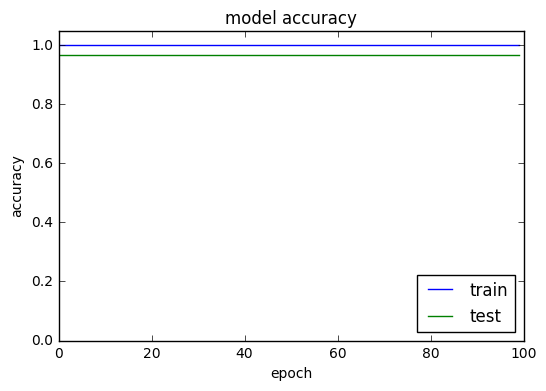

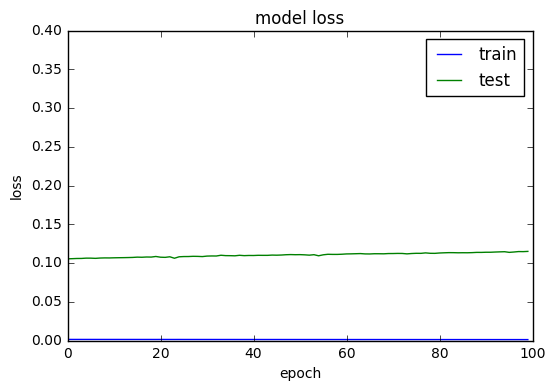

In [260]:
# summarize history for accuracy
plt.plot(hist_one.history['acc'])
plt.plot(hist_one.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1.05))
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(hist_one.history['loss'])
plt.plot(hist_one.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,.4))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [249]:
# Define two layers model
two_layer = Sequential()
two_layer.add(Dense(20,input_dim = 64,init='uniform'))
two_layer.add(Activation('relu'))
two_layer.add(Dense(10,init='uniform'))
two_layer.add(Activation('softmax'))

In [250]:
# Define learning process
two_layer.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [251]:
# Train the model
history = two_layer.fit(X_train,y_train, nb_epoch = 100, batch_size = 20, verbose = 0, validation_split=.33)

In [252]:
# Test the model
loss_and_metrics = two_layer.evaluate(X_test,y_test)
print("\nLoss: %.3f\nAccuracy: %.3f" % (loss_and_metrics[0],loss_and_metrics[1]))

320/540 [================>.............] - ETA: 0s
Loss: 0.256
Accuracy: 0.948


In [253]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


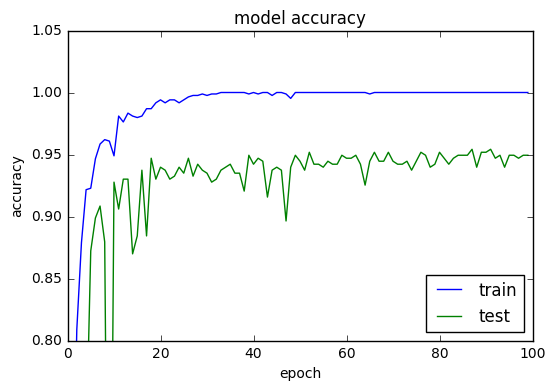

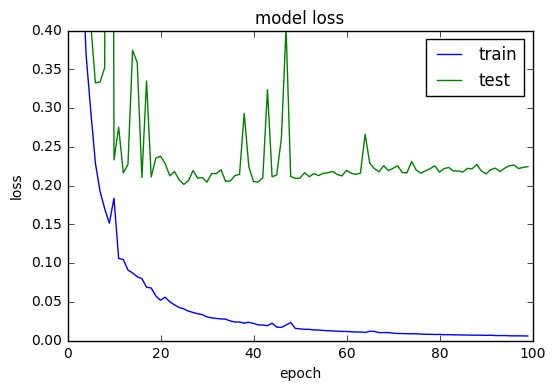

In [268]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0.8,1.05))
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,.4))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [269]:
# Define two layers model with regularization
from keras.regularizers import l2
two_layer_r = Sequential()
two_layer_r.add(Dense(20,input_dim = 64,init='uniform',W_regularizer=l2(0.01)))
two_layer_r.add(Activation('relu'))
two_layer_r.add(Dense(10,init='uniform'))
two_layer_r.add(Activation('softmax'))
# Define learning process
two_layer_r.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# Train the model
hist_two_r = two_layer_r.fit(X_train,y_train, nb_epoch = 100, batch_size = 20, verbose = 0, validation_split=.33)

416/540 [======================>.......] - ETA: 0s
Loss: 0.209
Accuracy: 0.943


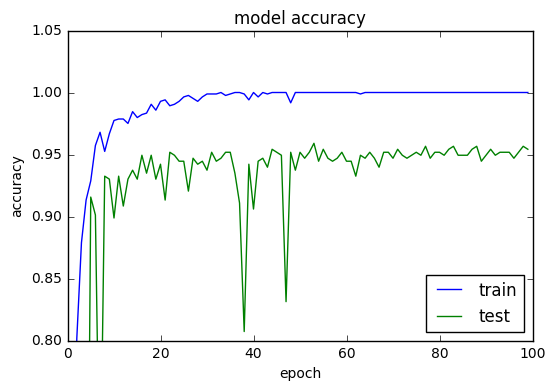

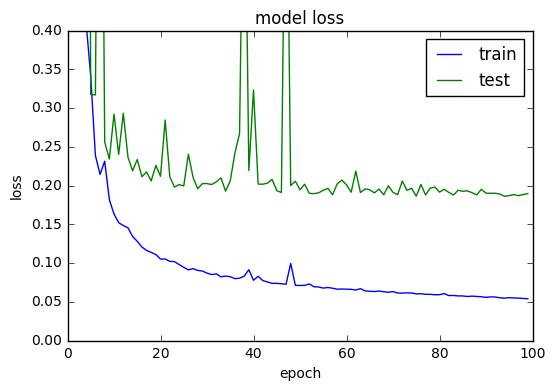

In [267]:
# Test the model
loss_and_metrics = two_layer_r.evaluate(X_test,y_test)
print("\nLoss: %.3f\nAccuracy: %.3f" % (loss_and_metrics[0],loss_and_metrics[1]))
# summarize history for accuracy
plt.plot(hist_two_r.history['acc'])
plt.plot(hist_two_r.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0.8,1.05))
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(hist_two_r.history['loss'])
plt.plot(hist_two_r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,.4))
plt.legend(['train', 'test'], loc='upper right')
plt.show()